  # Taller de Física Computacional

Carlos Ruestes / Cristián Sánchez - Taller de Física Computacional - FCEN - UNCUYO

# Rotación de un cuerpo rígido

Las ecuaciones diferenciales que describen el movimiento de un cuerpo rígido rotante, posiblemente sometido a torques externos, poseen soluciones que resultan realmente asombrosas. En esta famosa imagen vemos a Niels Bohr y Wolfgang Pauli, dos premios Nobel, mirando con fascinación un juguete llamado "Tippie Top":

![picture](imagenes/tippie_top.jpg)

La fascinación de los dos científicos puede apreciarse mejor al observar el juguete en acción.

(Para ver los videos ejecutar las celdas)

In [1]:
from IPython.display import YouTubeVideo

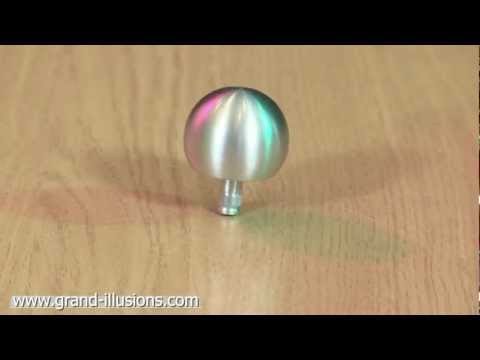

In [2]:
vid = YouTubeVideo("AyAgeUneFds", width="711",height="400",start=29)
display(vid)

El primer ejemplo que solemos ver cuando estudiamos la rotación del cuerpo rígido sometido a la acción de la fuerza de gravedad, el fenómeno conocido como precesión:

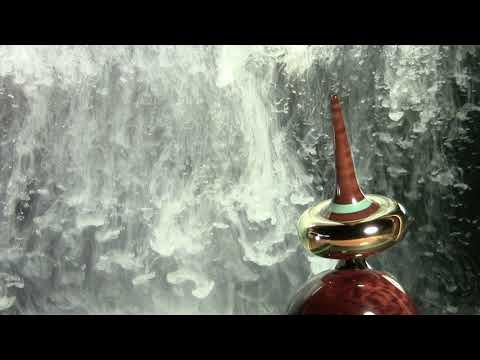

In [3]:
vid = YouTubeVideo("kbh1Yzzq0Ow", width="711",height="400")
display(vid)

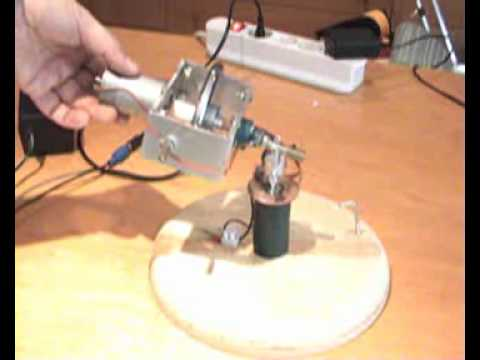

In [4]:
vid = YouTubeVideo("hVKz9G3YXiw", width="711",height="533",start=43)
display(vid)

Uno podría imaginar que en ausencia de torques externos la rotación debiera ser siembre muy simple, sin embargo, el siguiente video de un objeto rotando en la estación espacial con gravedad cero demuestra lo contrario:

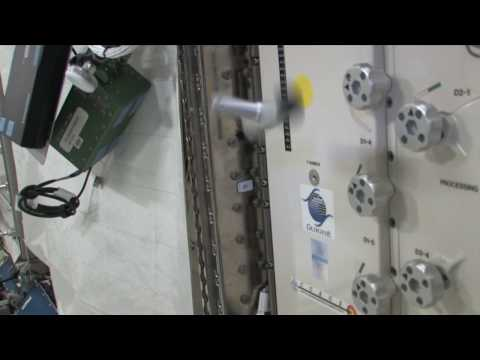

In [5]:
vid = YouTubeVideo("1n-HMSCDYtM", width="711",height="400")
display(vid)

En los cursos de mecánica rara vez se avanza más allá de estudiar las causas de la precesión o nutación debido a que las ecuaciones diferenciales que gobiernan la rotación del cuerpo rígido poseen soluciones analíticas sólo para ciertas situaciones de alta simetría. Pero utilizando la computadora podemos eliminar esta limitación e integrar numéricamente las ecuaciones de movimiento para simular esta variedad de comportamientos.

## Ecuaciones de Euler

La ecuación de movimiento para el momento angular en un marco inercial de reeferencia es la siguiente:

$$ \dot{\mathbf{L}}=\frac{d\mathbf{L}}{dt}=\boldsymbol\tau$$

donde $\boldsymbol\tau$ es el *torque*. Recordamos aquí sin muchas aclaraciones (porque nos será útil más adelante) que el torque de una fuerza está dado por $\boldsymbol\tau = \mathbf{r} \times \mathbf{f}$. 

Recordemos que el momento angular de un cuerpo rígido está relacionado con su velocidad angular $\boldsymbol\omega$ por medio de

$$ \mathbf{L}=\mathbf{I}\boldsymbol\omega$$

donde $\mathbf{I}$ es el *tensor de inercia*. La aparente simplicidad de esta útlima ecuación esconde una gran complejidad debido a que, en una situación general, tanto el momento angular como el tensor de inercia y la velocidad angular *dependen del tiempo*. En los cursos de mecánica de diferentes niveles se tratan situaciones en las que, por ejemplo, el tensor de inercia es constante. Estas situaciones de alta simetría permiten resolver sólo casos muy particulares del movimiento. Nos interesa aquí obtener un conjunto de ecuaciones generales que nos permitan describir el movimiento en situaciones arbitrarias. Sin embargo comenzaremos integrando  las llamadas *Ecuaciones de Euler* para la rotación de un cuerpo rígido (Euler fue un matemático tan prolífico que hay muuuchas [ecuaciones con su nombre](https://en.wikipedia.org/wiki/List_of_things_named_after_Leonhard_Euler)). La Ecuaciones de Euler son ecuaciones de movimiento para la velocidad angular en el marco de referencia del cuerpo que rota. Si elejimos como ejes para describir el movimiento los *ejes principales de inercia*, el tensor de inercia será independiente del tiempo y diagonal con elementos iguales a los momentos de inercia en relación a los ejes principales:

$$ \mathbf{I} = 
\begin{bmatrix}
   I_1 & 0 & 0\\
   0   & I_2 & 0 \\
   0 & 0 & I_3
\end{bmatrix} 
$$

La tasa de cambio del vector momento angular (o cualquier otro) en sistema un inercial está relacionada a la tasa de cambio del vector en un sistema rotante que rota con velocidad angular $\boldsymbol\omega$ de la siguiente forma:

$$
\frac{d\mathbf{L}_{\mathrm lab}}{dt}
=
\frac{d\mathbf{L}_{\mathrm rot}}{dt} 
+ \boldsymbol\omega\times\mathbf{L}_{\mathrm rot}
$$

Donde $L_{\mathrm lab}$ es el momento angular en el marco de referencia inercial (coordenadas de laboratorio) y $L_{\mathrm rot}$ el momento angular en el sistema rotante. Teniendo en cuenta que en el marco de referencia del cuerpo rotante (para nuestra elección de ejes) el tensor de inercia es constante, podemos reemplazar y obtener

$$
\boldsymbol\tau = \mathbf{I}\dot{\boldsymbol\omega}+ \boldsymbol\omega\times\mathbf{I}\boldsymbol\omega
$$

Expandiendo los productos y resolviendo en componentes llegamos al conjunto de ecuaciones de movimiento

$$\dot{\omega}_1 = - \frac{(I_3 - I_2)}{I_1} \omega_2 \omega_3$$
$$\dot{\omega}_2 = - \frac{(I_1 - I_3)}{I_2} \omega_3 \omega_1$$
$$\dot{\omega}_3 = - \frac{(I_2 - I_1)}{I_3} \omega_1 \omega_2$$

donde $\mathbf{\omega} = (\omega_1,\omega_2,\omega_3)$ y hemos asumido la condición particular de torque nulo. Este es un sistema de tres ecuaciones diferenciales acopladas similar a los que hemos estado resolviendo en clases anteriores.

En este *notebook* en vez de implementar un integrador de ecuaciones diferenciales utilizaremos el que se incluye en la librería SciPy: `odeint`.

## Teorema del eje intermedio y Ecuaciones de Euler

Como primer ejemplo de integración mostraremos como, para un cuerpo que posee tres momentos de inercia distintos, la rotación sólo es estable cuando la velocidad angular es cercana a a uno de los ejes con mayor o menor momento de inercia y es inestable para velocidades angulares cercanas al eje con momento de inercia intermedio. 

Primero importamos todos los módulos que utilizaremos:

In [6]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Definimos un vector que contiene los momentos principales de inercia. Lo hacemos de forma tal que los tres ejes poseen momentos de inercia diferentes. Esto corresponde a la situación con menos simetría posible.

In [7]:
I = np.array([30.0,20.0,10.0])

El integrador que utilizaremos consume como parámetro una rutina que devuelve un vector conteniendo cada uno de los lados derechos del sistema de ecuaciones diferenciales a resolver, en nuestro caso, cada uno de los componentes del vector $\dot{\boldsymbol\omega}$:

In [8]:
def domega(omega,t,I):
    domegadt = np.array([-(I[2]-I[1])*omega[1]*omega[2]/I[0],
                -(I[0]-I[2])*omega[2]*omega[0]/I[1],
                -(I[1]-I[0])*omega[0]*omega[1]/I[2]])
    return domegadt

El integrador consume además un vector conteniendo los puntos en los que nos interesa evaluar la solución así como la condición inicial para cada ecuación diferencial ($t$ y $\boldsymbol\omega(t=0)$):

In [9]:
t = np.linspace(0,100,1000)

-----

Comenzamos con una velocidad angular que está levemente desviada del eje de mayor momento de inercia:

In [10]:
omega0 = [1.0,0.1,0.1]

En esta celda llamamos al integrador que devuelve en el arreglo `sol` el vector de soluciones para cada tiempo. El último parametro que consume la rutina `odeint` es una tupla conteniendo los demás parámetros de la funcióon que calcula los lados derechos. En nuestro caso la función consume un único parámetro:

In [11]:
sol = odeint(domega, omega0, t, args=(I,))

Una vez que la celda ha sido ejecutada el arreglo `sol` contiene las componentes del vector momento angular en función del tiempo. En los siguientes gráficos vemos como la velocidad angular se mantiene estable rotando alrededor del eje de mayor inercia describiendo un movimiento de *precesión*. Este movimiento de precesión se observa como una oscilación fuera de fase en las componentes del vector momento angular:

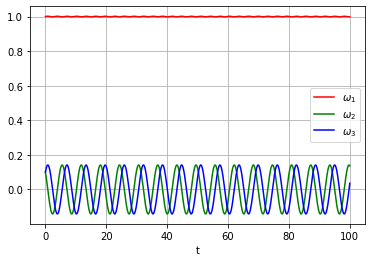

In [12]:
plt.plot(t,sol[:,0],color="red",label="$\omega_1$")
plt.plot(t,sol[:,1],color="green",label="$\omega_2$")
plt.plot(t,sol[:,2],color="blue",label="$\omega_3$")
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()

La precesión se hace más evidente si graficamos el extremo del vector en función del tiempo. En este caso se observa como el extremo del vector describe un círculo alrededor del eje $x$:

/tmp/ipykernel_37374/168054603.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


(-1.0, 1.0)

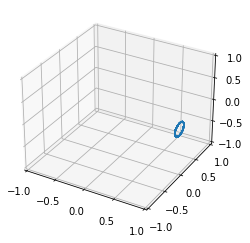

In [13]:
plt.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(sol[:,0], sol[:,1], sol[:,2])
ax.set_xlim(-1.0,1.0)
ax.set_ylim(-1.0,1.0)
ax.set_zlim(-1.0,1.0)

**IMPORTANTE**: Notar que como $\mathbf{L}=\mathbf{I}\boldsymbol\omega$ y el tensor de inercia es diagonal entonces $\mathbf{L}$ es paralelo a $\boldsymbol\omega$ y por lo tanto el momento angular no es constante a pesar de que no hay torque. Esto se debe a que estamos trabajando en el sistema de coordenadas rotante que es un sistema de referencia no inercial.

-----

Si nuestra condición inicial establece una velocidad angular que aproximadamente coincide con el eje de menor momento de inercia se observa un resultado similar. Haciendo un poco más grandes las componentes en las otras direcciones podemos observar que el movimiento no es una precesión simple dado que la figura que describe el extremo del vector no es un círculo.

In [14]:
omega0 = [0.2,0.2,1.0]

In [15]:
sol = odeint(domega, omega0, t, args=(I,))

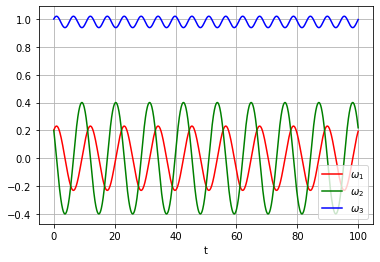

In [16]:
plt.plot(t,sol[:,0],color="red",label="$\omega_1$")
plt.plot(t,sol[:,1],color="green",label="$\omega_2$")
plt.plot(t,sol[:,2],color="blue",label="$\omega_3$")
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()

/tmp/ipykernel_37374/4269588652.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


(-1.0, 1.0)

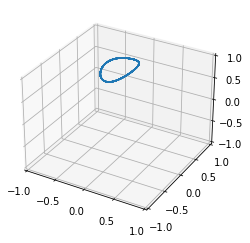

In [17]:

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(sol[:,0], sol[:,1], sol[:,2])
ax.set_xlim(-1.0,1.0)
ax.set_ylim(-1.0,1.0)
ax.set_zlim(-1.0,1.0)

-----

El caso que describe la situación mostrada en el video de la "manija T" en gravedad cero corresponde a una velocidad angular inicial coincidente con el eje intermedio. Nótese que los componentes de $\boldsymbol\omega_0$ en las otras direcciones son tres órdenes de magnitud menores que en los casos anteriores.

In [18]:
omega0 = [0.0001,1.0,0.0001]

In [19]:
sol = odeint(domega, omega0, t, args=(I,))

Se observa como en este caso la velocidad angula (en el sistema de coordenadas ligado a los ejes principales de inercia) cambia de sentido periódicamente en el tiempo y la rotación es inestable. Esto ocurre sin importar cuan pequeñas sean las componentes en los otros ejes. La situación descripta en este caso es un ejemplo de las descriptas por el "Teorema del eje intermedio". Este teorema que enuncia que para un sólido que posee tres momentos principales de inercia distintos la rotación alrededor de su eje de inercia intermedio es siempre inestable.

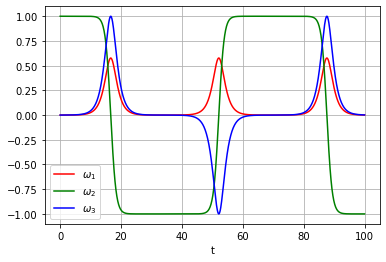

In [20]:
plt.plot(t,sol[:,0],color="red",label="$\omega_1$")
plt.plot(t,sol[:,1],color="green",label="$\omega_2$")
plt.plot(t,sol[:,2],color="blue",label="$\omega_3$")
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()

/tmp/ipykernel_37374/1769577616.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


(-1.0, 1.0)

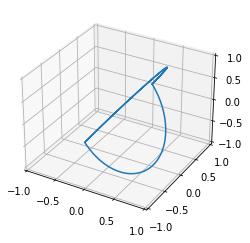

In [21]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(sol[:,0], sol[:,1], sol[:,2])
ax.set_xlim(-1.0,1.0)
ax.set_ylim(-1.0,1.0)
ax.set_zlim(-1.0,1.0)

Éste último resultado explica parcialmente la dinámica de la "manija T" en gravedad cero. Podemos obtener las ecuaciones de movimiento del sólido en el sistema inercial bajo la posible acción de un torque a los fines de describir las otras situaciones que se muestran al inicio de esta hoja. Lo hacemos en la siguiente.